In [ ]:
import pandas as pd
import numpy as np
import os, glob
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import random
import matplotlib.gridspec as gridspec
import platform

In [ ]:
def os_setting():
    if platform.system() == 'Darwin': #맥
            plt.rc('font', family='AppleGothic') 
    elif platform.system() == 'Windows': #윈도우
            plt.rc('font', family='Malgun Gothic') 
    elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
            #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
            #!mv malgun.ttf /usr/share/fonts/truetype/
            #import matplotlib.font_manager as fm 
            #fm._rebuild() 
            plt.rc('font', family='Malgun Gothic') 
    plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

os_setting()

In [ ]:
path = "D:/shin/data/gender/"
fig_path = 'D:/shin/최종 소스코드 및 데이터/fig/'
file = os.listdir(path)

In [ ]:
file

['산업별 성희롱 경험 여부.png',
 '성희롱_경험_여부.csv',
 '성희롱_전담부서_및_업무처리_담당자_20220125151805.csv',
 '여성가족부_가족친화인증기업 현황.csv',
 '종류별 직장 내 성차별 경험 여부.png',
 '직장 내 성희롱 고충 처리 기구 안내 여부.png',
 '직장 내 성희롱 고충 처리 기구 유무.png',
 '직장 내 성희롱 업무처리 담당자 유무.png',
 '직장_내_성_차별_여부.csv']

## 성희롱 및 성차별 경험 여부

### 성희롱 경험 여부

In [ ]:
harassment_data = pd.read_csv(path+'/성희롱_경험_여부.csv', encoding='cp949', header=[0,1])
sexism_data= pd.read_csv(path+'/직장_내_성_차별_여부.csv', encoding='cp949', header=[0,1])

In [ ]:
harassment_data = harassment_data.iloc[5:16, 1:]

In [ ]:
x_label = harassment_data['구분별(2)'].values.flatten().tolist()

In [ ]:
y_label = harassment_data['2018', '있다'].values.tolist()
n_label = harassment_data['2018', '없다'].values.tolist()

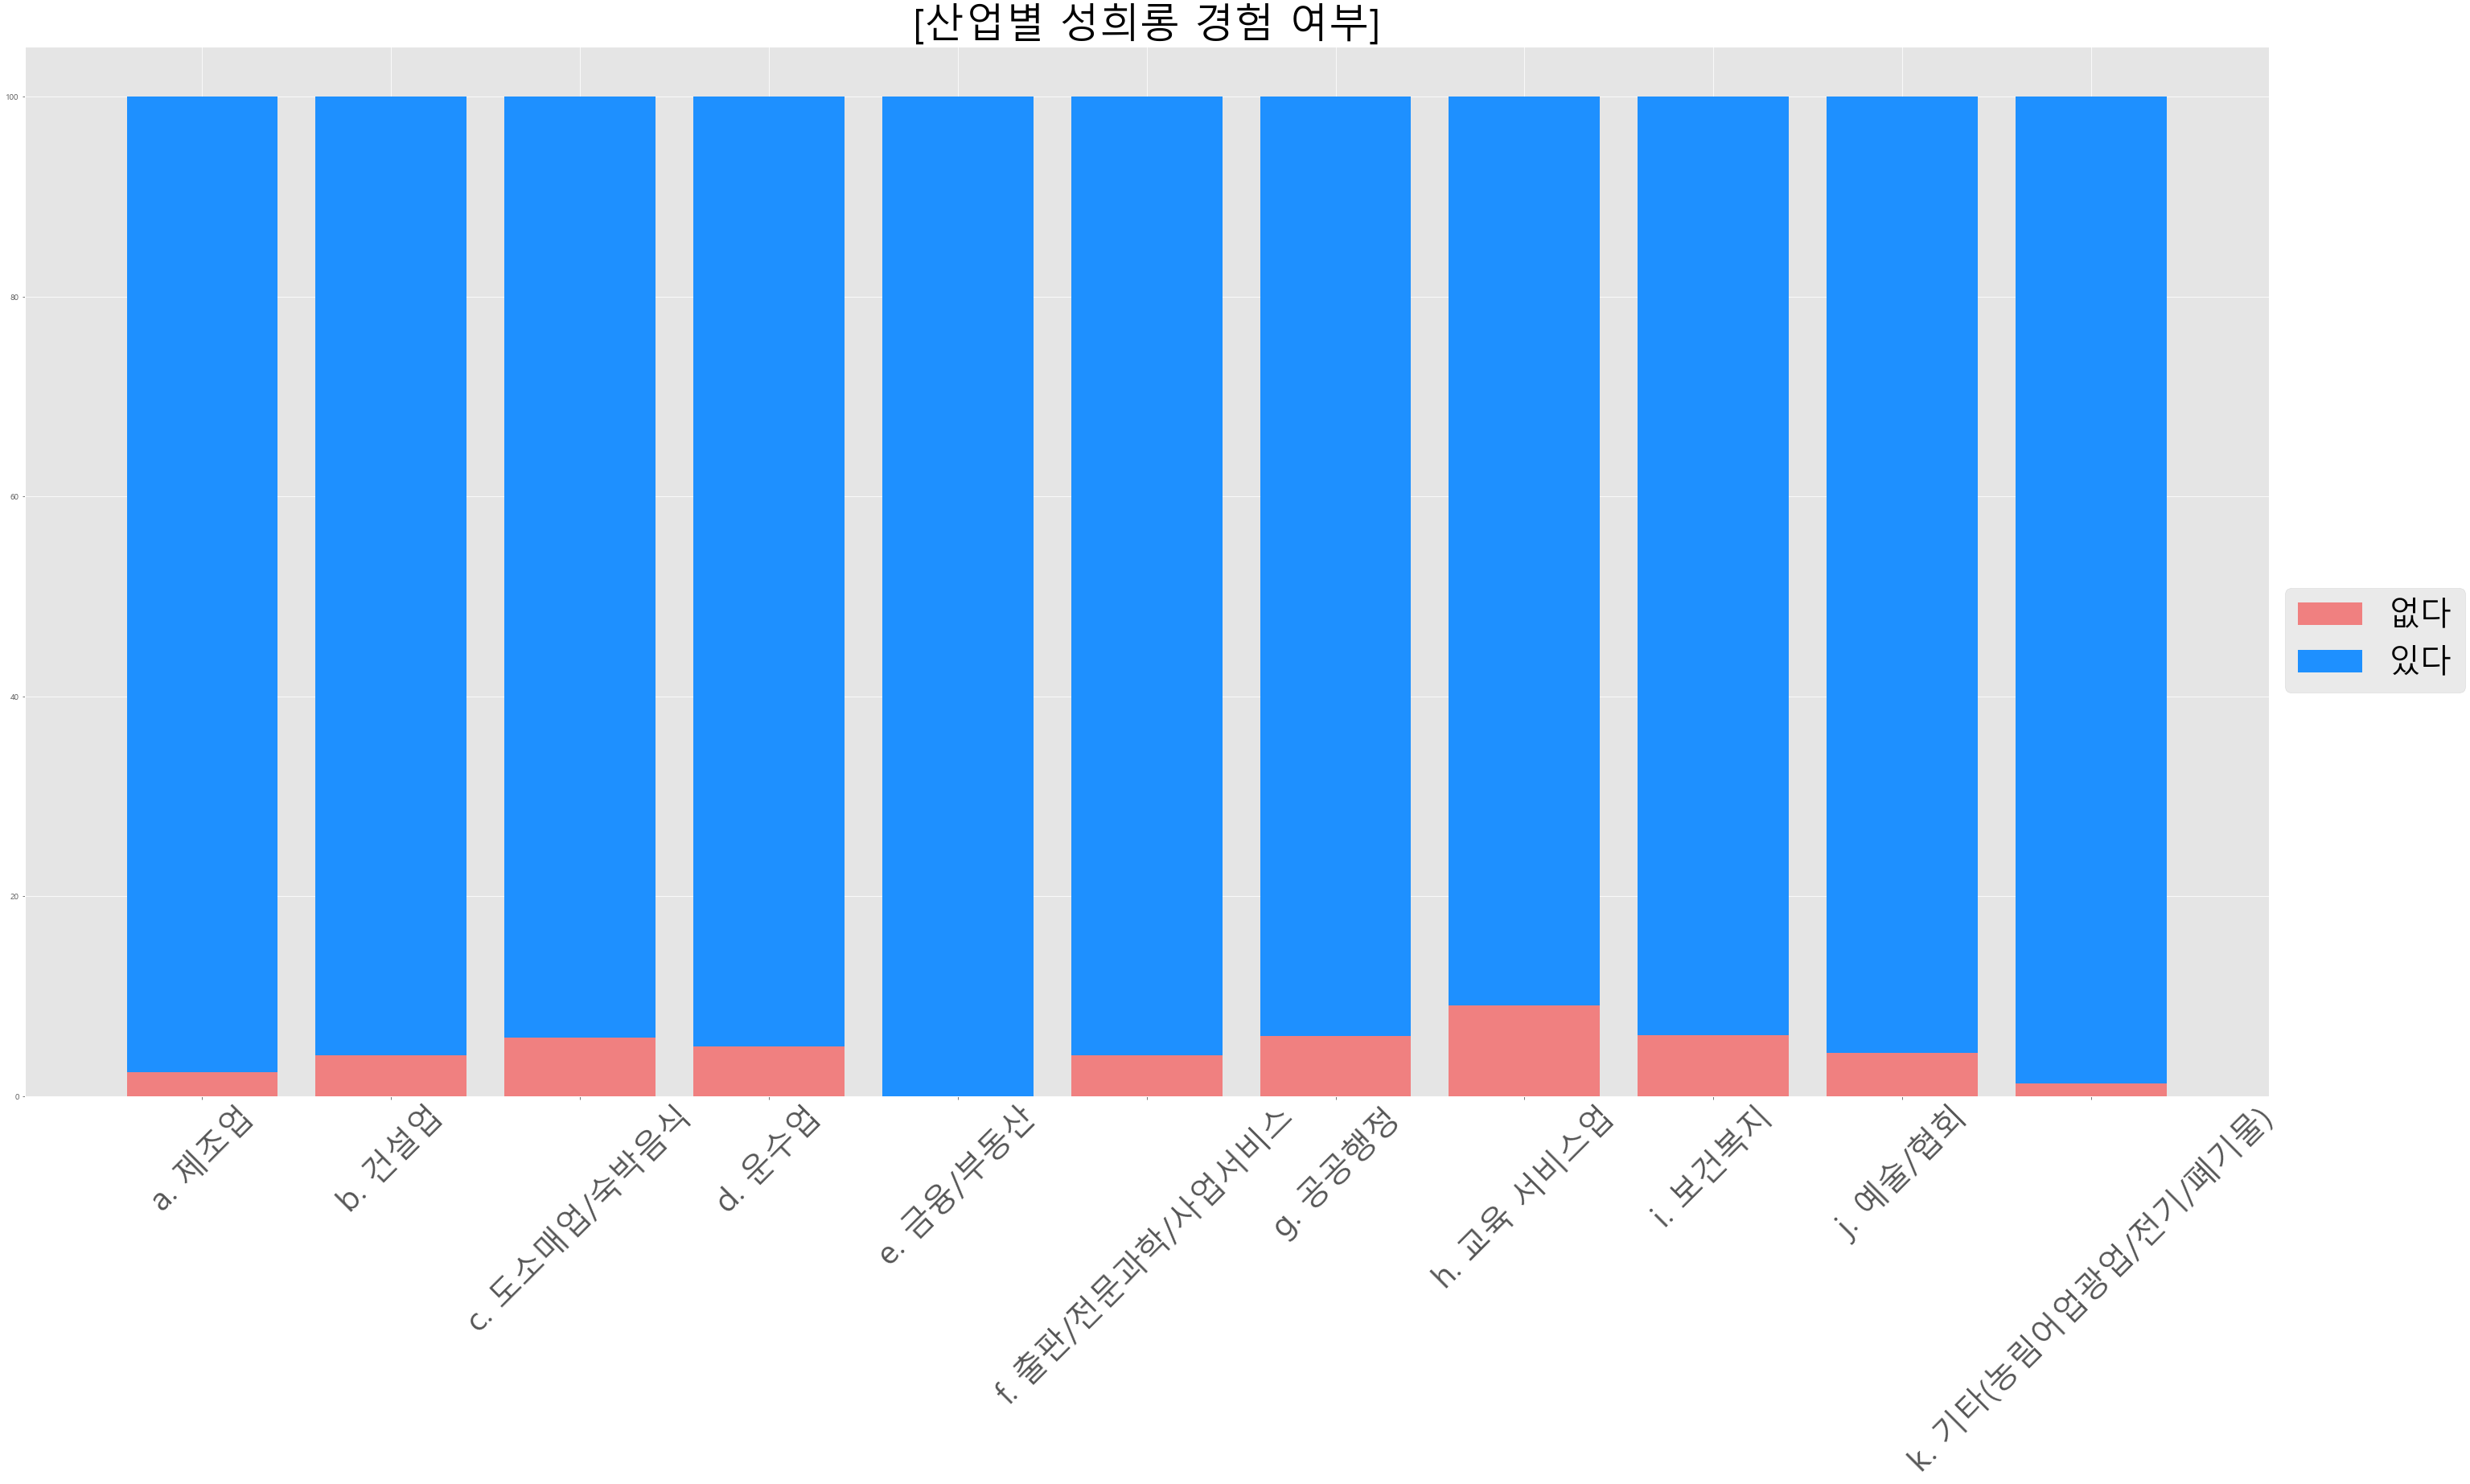

In [ ]:
plt.rcParams['figure.figsize'] = [50, 24]
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=40)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('[산업별 성희롱 경험 여부]', fontsize=50)

plt.bar(x_label, y_label, color='lightcoral', label='없다')
plt.bar(x_label, n_label, color='dodgerblue', bottom =y_label, label='있다')

plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))

plt.savefig(fig_path + '산업별 성희롱 경험 여부.png')

### 직장 내 성차별 경험 여부

In [ ]:
sexism_data = sexism_data.iloc[:5, 2:]

In [ ]:
x_label = sexism_data['성차별 여부별(1)'].values.flatten()

In [ ]:
r_right = '정말 그렇다'
right = '대체로 그렇다'
s_right = '별로 그렇지 않다'
n_right = '전혀 그렇지 않다'

In [ ]:
def survey(data, year):
    r_right_data = data[year, r_right].values
    right_data = data[year, right].values
    s_right_data = data[year, s_right].values
    n_right_data = data[year, n_right].values
    
    return r_right_data, right_data, s_right_data, n_right_data

In [ ]:
rr_2018, r_2018, s_2018, n_2018 = survey(sexism_data, '2018')
rr_2016, r_2016, s_2016, n_2016 = survey(sexism_data, '2016')
rr_2014, r_2014, s_2014, n_2014 = survey(sexism_data, '2014')
rr_2012, r_2012, s_2012, n_2012 = survey(sexism_data, '2012')

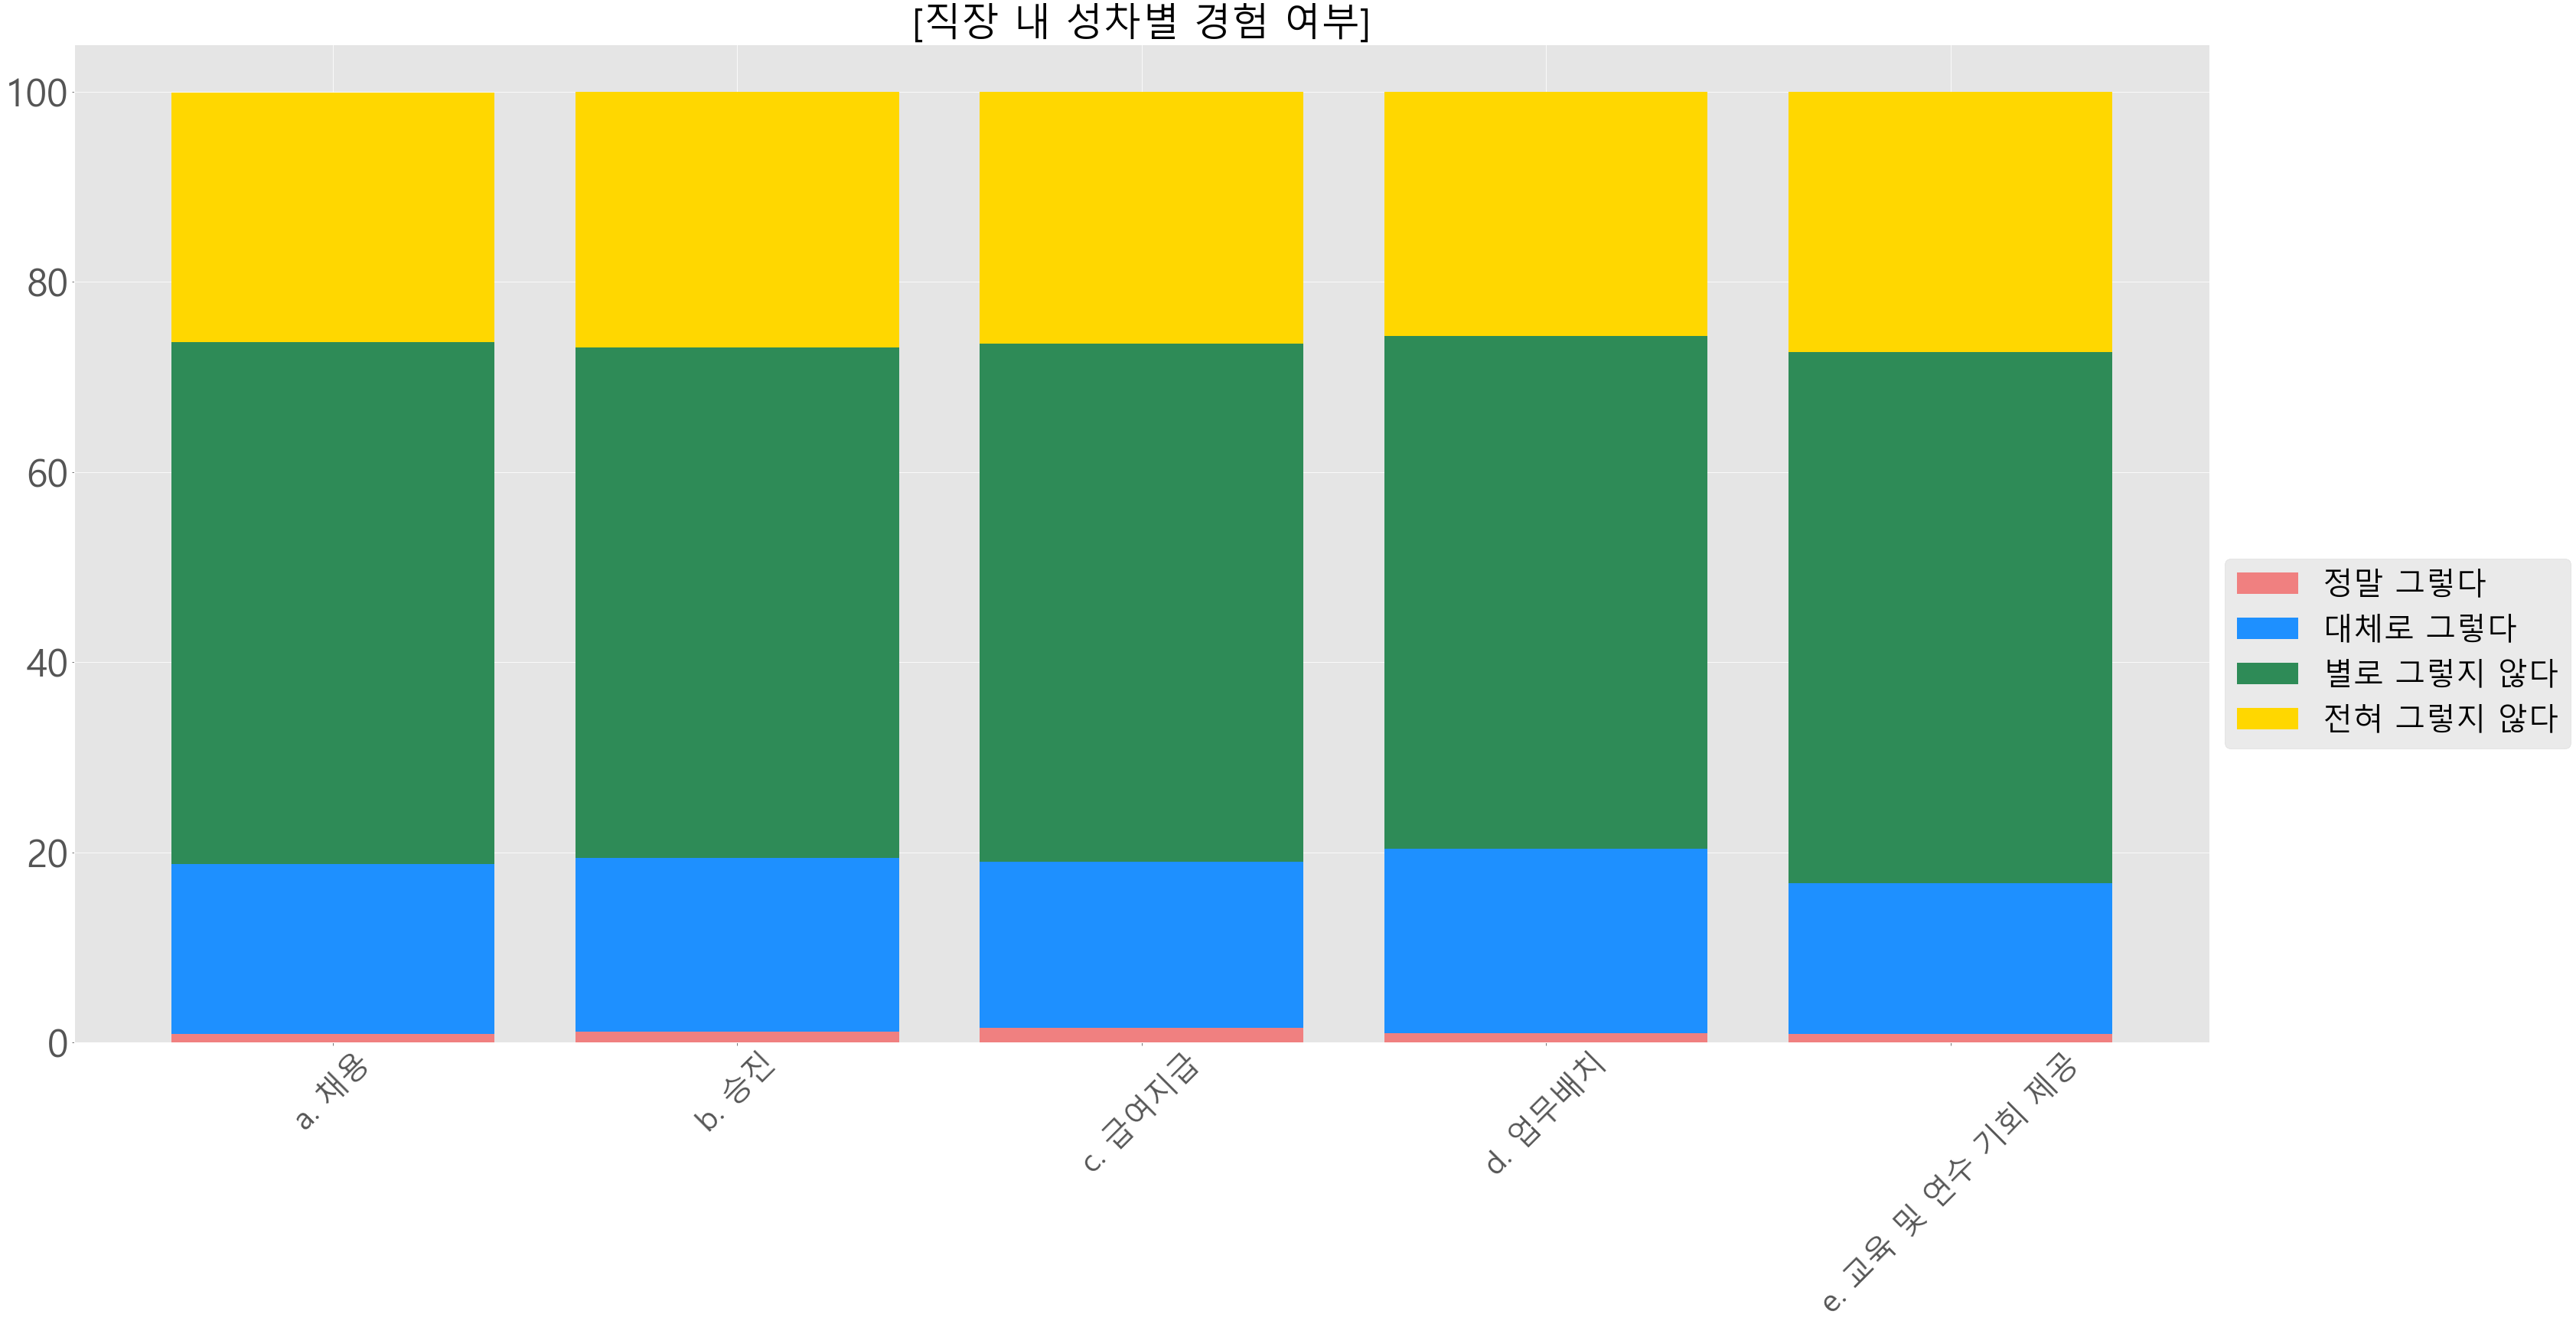

In [ ]:
plt.rcParams['figure.figsize'] = [50, 24]
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=40)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('[직장 내 성차별 경험 여부]', fontsize=50)

plt.bar(x_label, rr_2018, color='lightcoral', label=r_right)
plt.bar(x_label, r_2018, color='dodgerblue', bottom =rr_2018, label=right)
plt.bar(x_label, s_2018, color='seagreen', bottom =rr_2018+r_2018, label=s_right)
plt.bar(x_label, n_2018, color='gold', bottom =rr_2018 + r_2018 + s_2018, label=n_right)

plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))

plt.savefig(fig_path + '종류별 직장 내 성차별 경험 여부.png')

### 성희롱 전담 부서 유무 현황

In [ ]:
admin_har= pd.read_csv(path+'/성희롱_전담부서_및_업무처리_담당자_20220125151805.csv', encoding='cp949', header=[0,1,2])

In [ ]:
admin_har = admin_har.iloc[5:16, 1:]

In [ ]:
aq = '직장 내에 성희롱 고충처리기구가 있다'
bq = '성희롱 고충처리기구에 대한 안내를 받은 적이 있다'
cq = '직장 내에 성희롱 업무처리 담당자가 있다'
dq = '성희롱 업무처리 담당자에 대한 안내를 받은 적이 있다'

yes = '그렇다'
no = '아니다'
dk = '잘 모르겠다'

In [ ]:
def survey(data, q_kind, year):
    x_label = data['구분별(2)'].values.flatten().tolist()
    
    yes_data = data[year, q_kind, yes].values
    no_data = data[year, q_kind, no].values
    dk_data = data[year, q_kind, dk].values
    
    return x_label, yes_data, no_data, dk_data

In [ ]:
admin_har_label, yes_data, no_data, dk_data = survey(admin_har, aq, '2018')

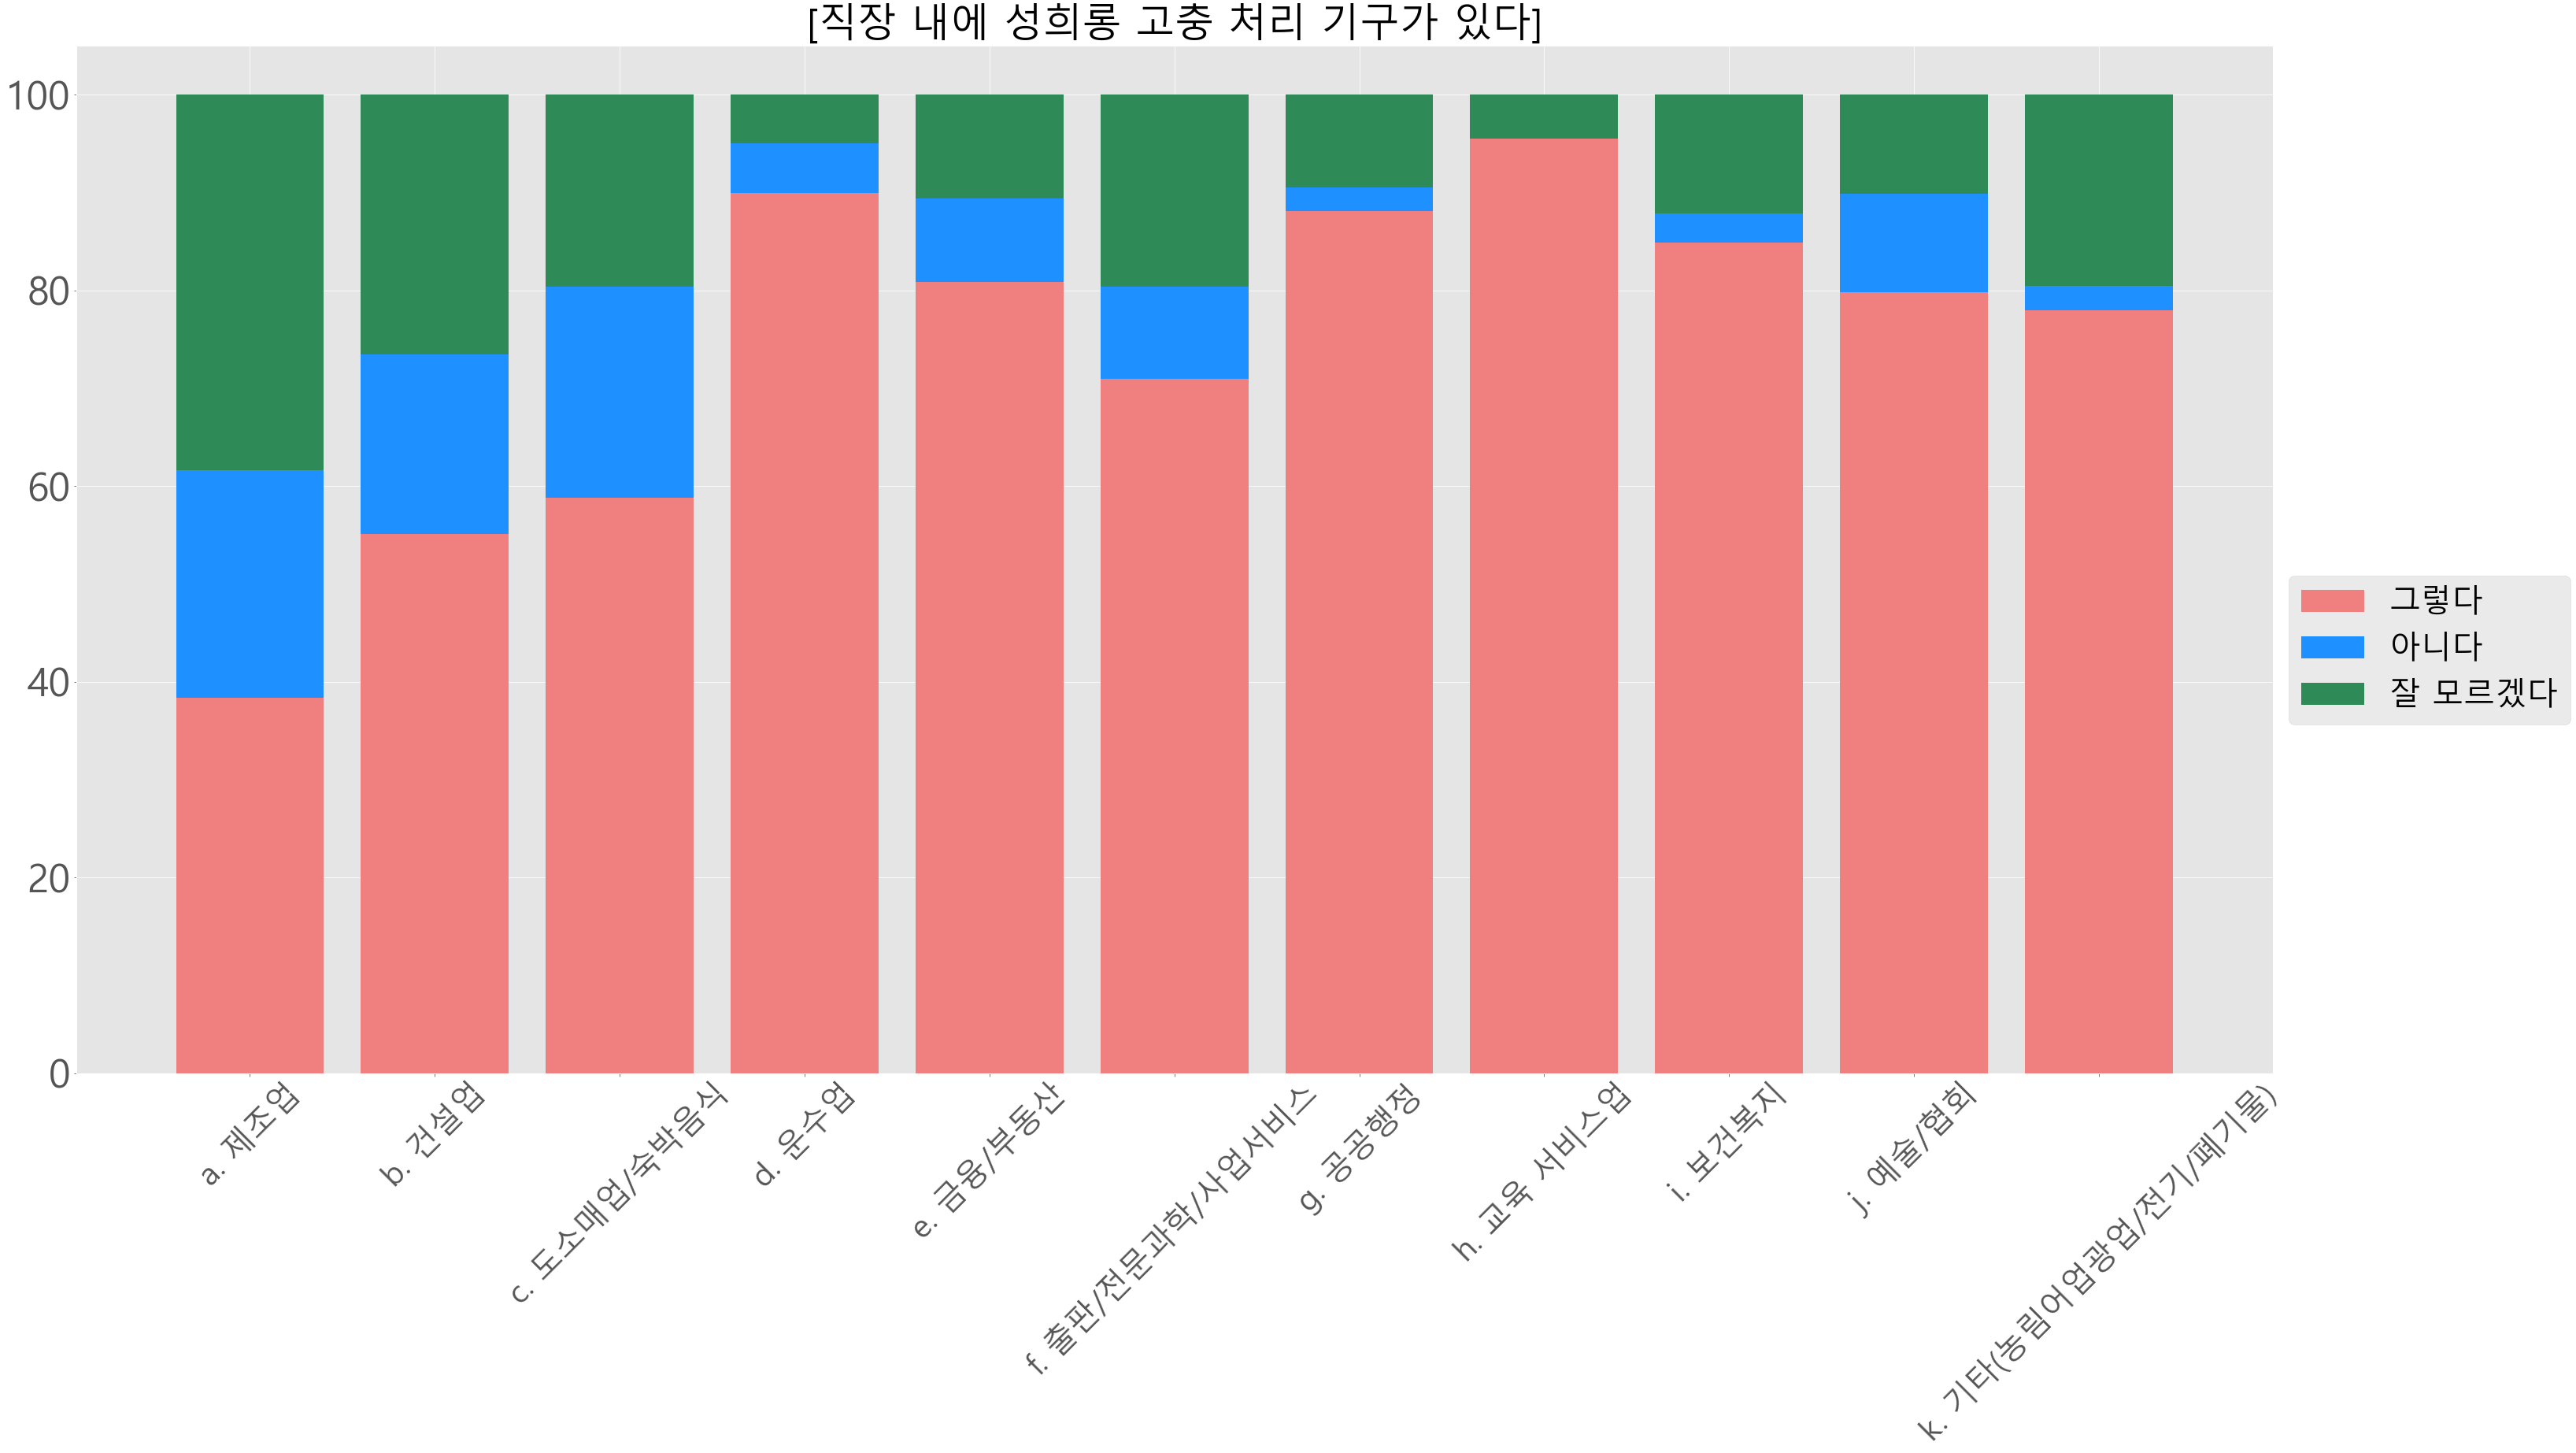

In [ ]:
plt.rcParams['figure.figsize'] = [50, 24]
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=40)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('[직장 내에 성희롱 고충 처리 기구가 있다]', fontsize=50)

plt.bar(admin_har_label, yes_data, color='lightcoral', label=yes)
plt.bar(admin_har_label, no_data, color='dodgerblue', bottom =yes_data, label=no)
plt.bar(admin_har_label, dk_data, color='seagreen', bottom =yes_data+no_data, label=dk)

plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))

plt.savefig(fig_path + '직장 내 성희롱 고충 처리 기구 유무.png')

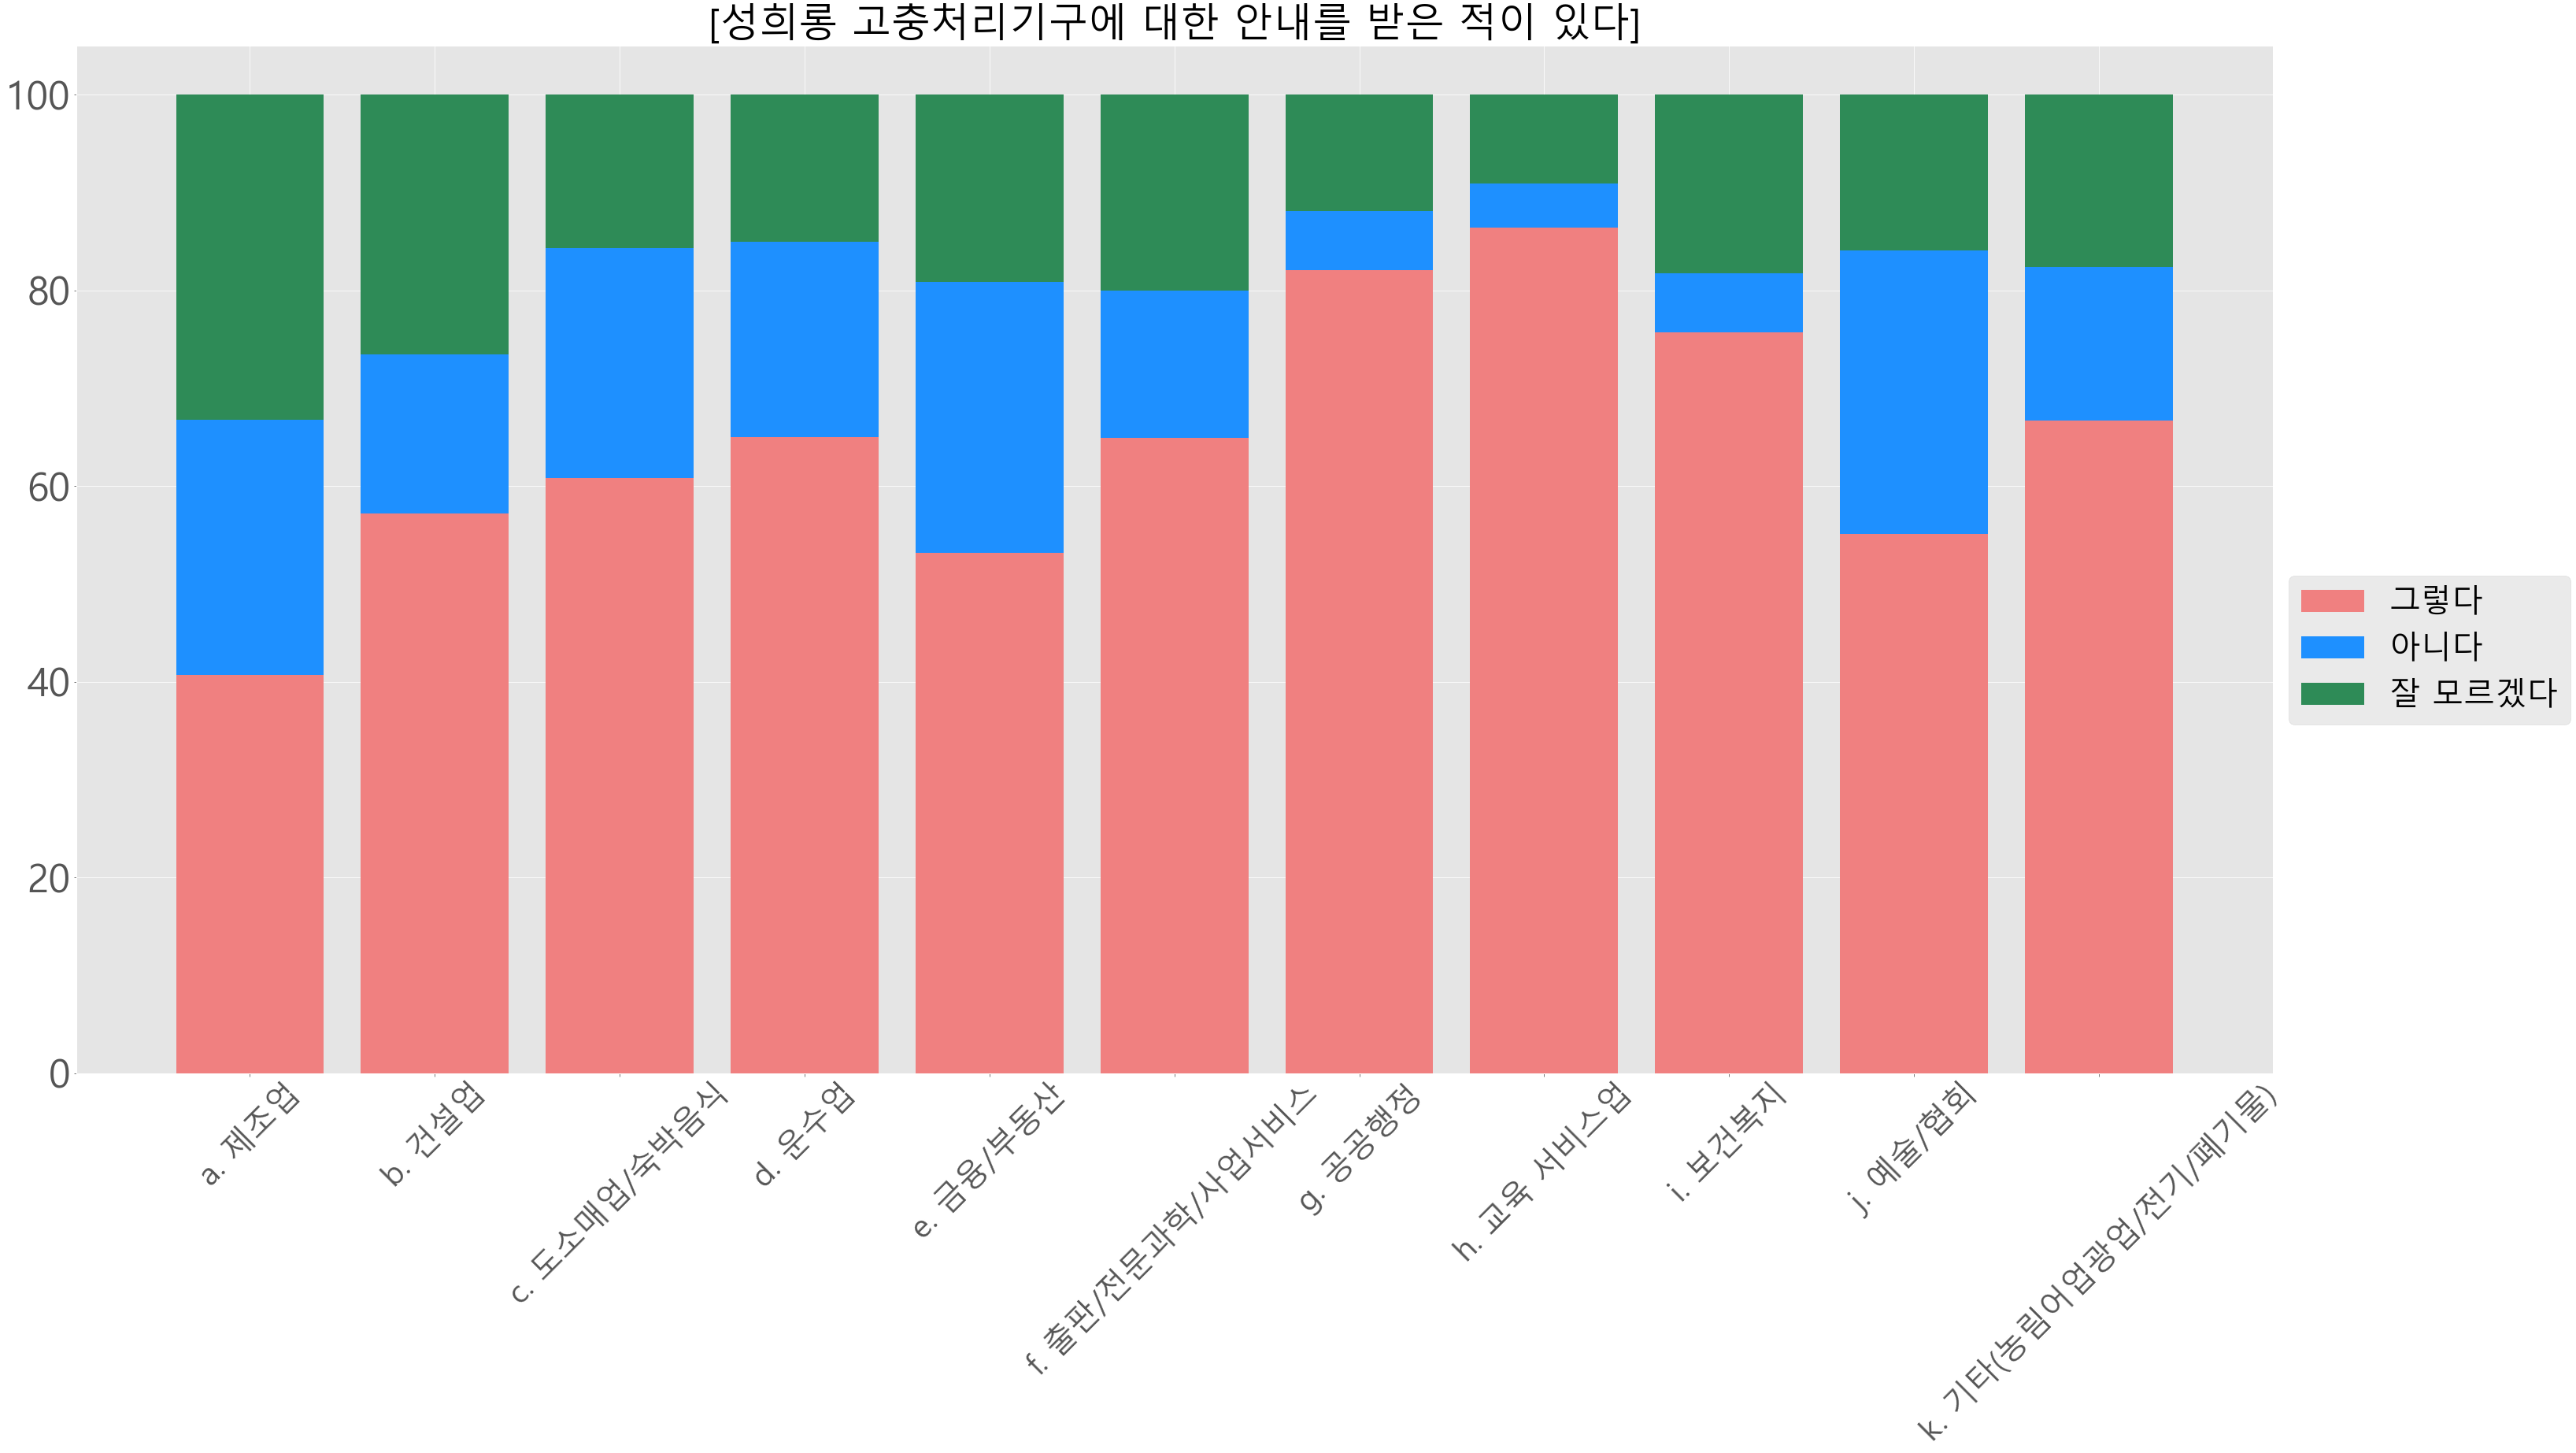

In [ ]:
admin_har_label, yes_data, no_data, dk_data = survey(admin_har, bq, '2018')

plt.rcParams['figure.figsize'] = [50, 24]
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=40)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('['+bq+']', fontsize=50)

plt.bar(admin_har_label, yes_data, color='lightcoral', label=yes)
plt.bar(admin_har_label, no_data, color='dodgerblue', bottom =yes_data, label=no)
plt.bar(admin_har_label, dk_data, color='seagreen', bottom =yes_data+no_data, label=dk)

plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
plt.savefig(fig_path + '직장 내 성희롱 고충 처리 기구 안내 여부.png')

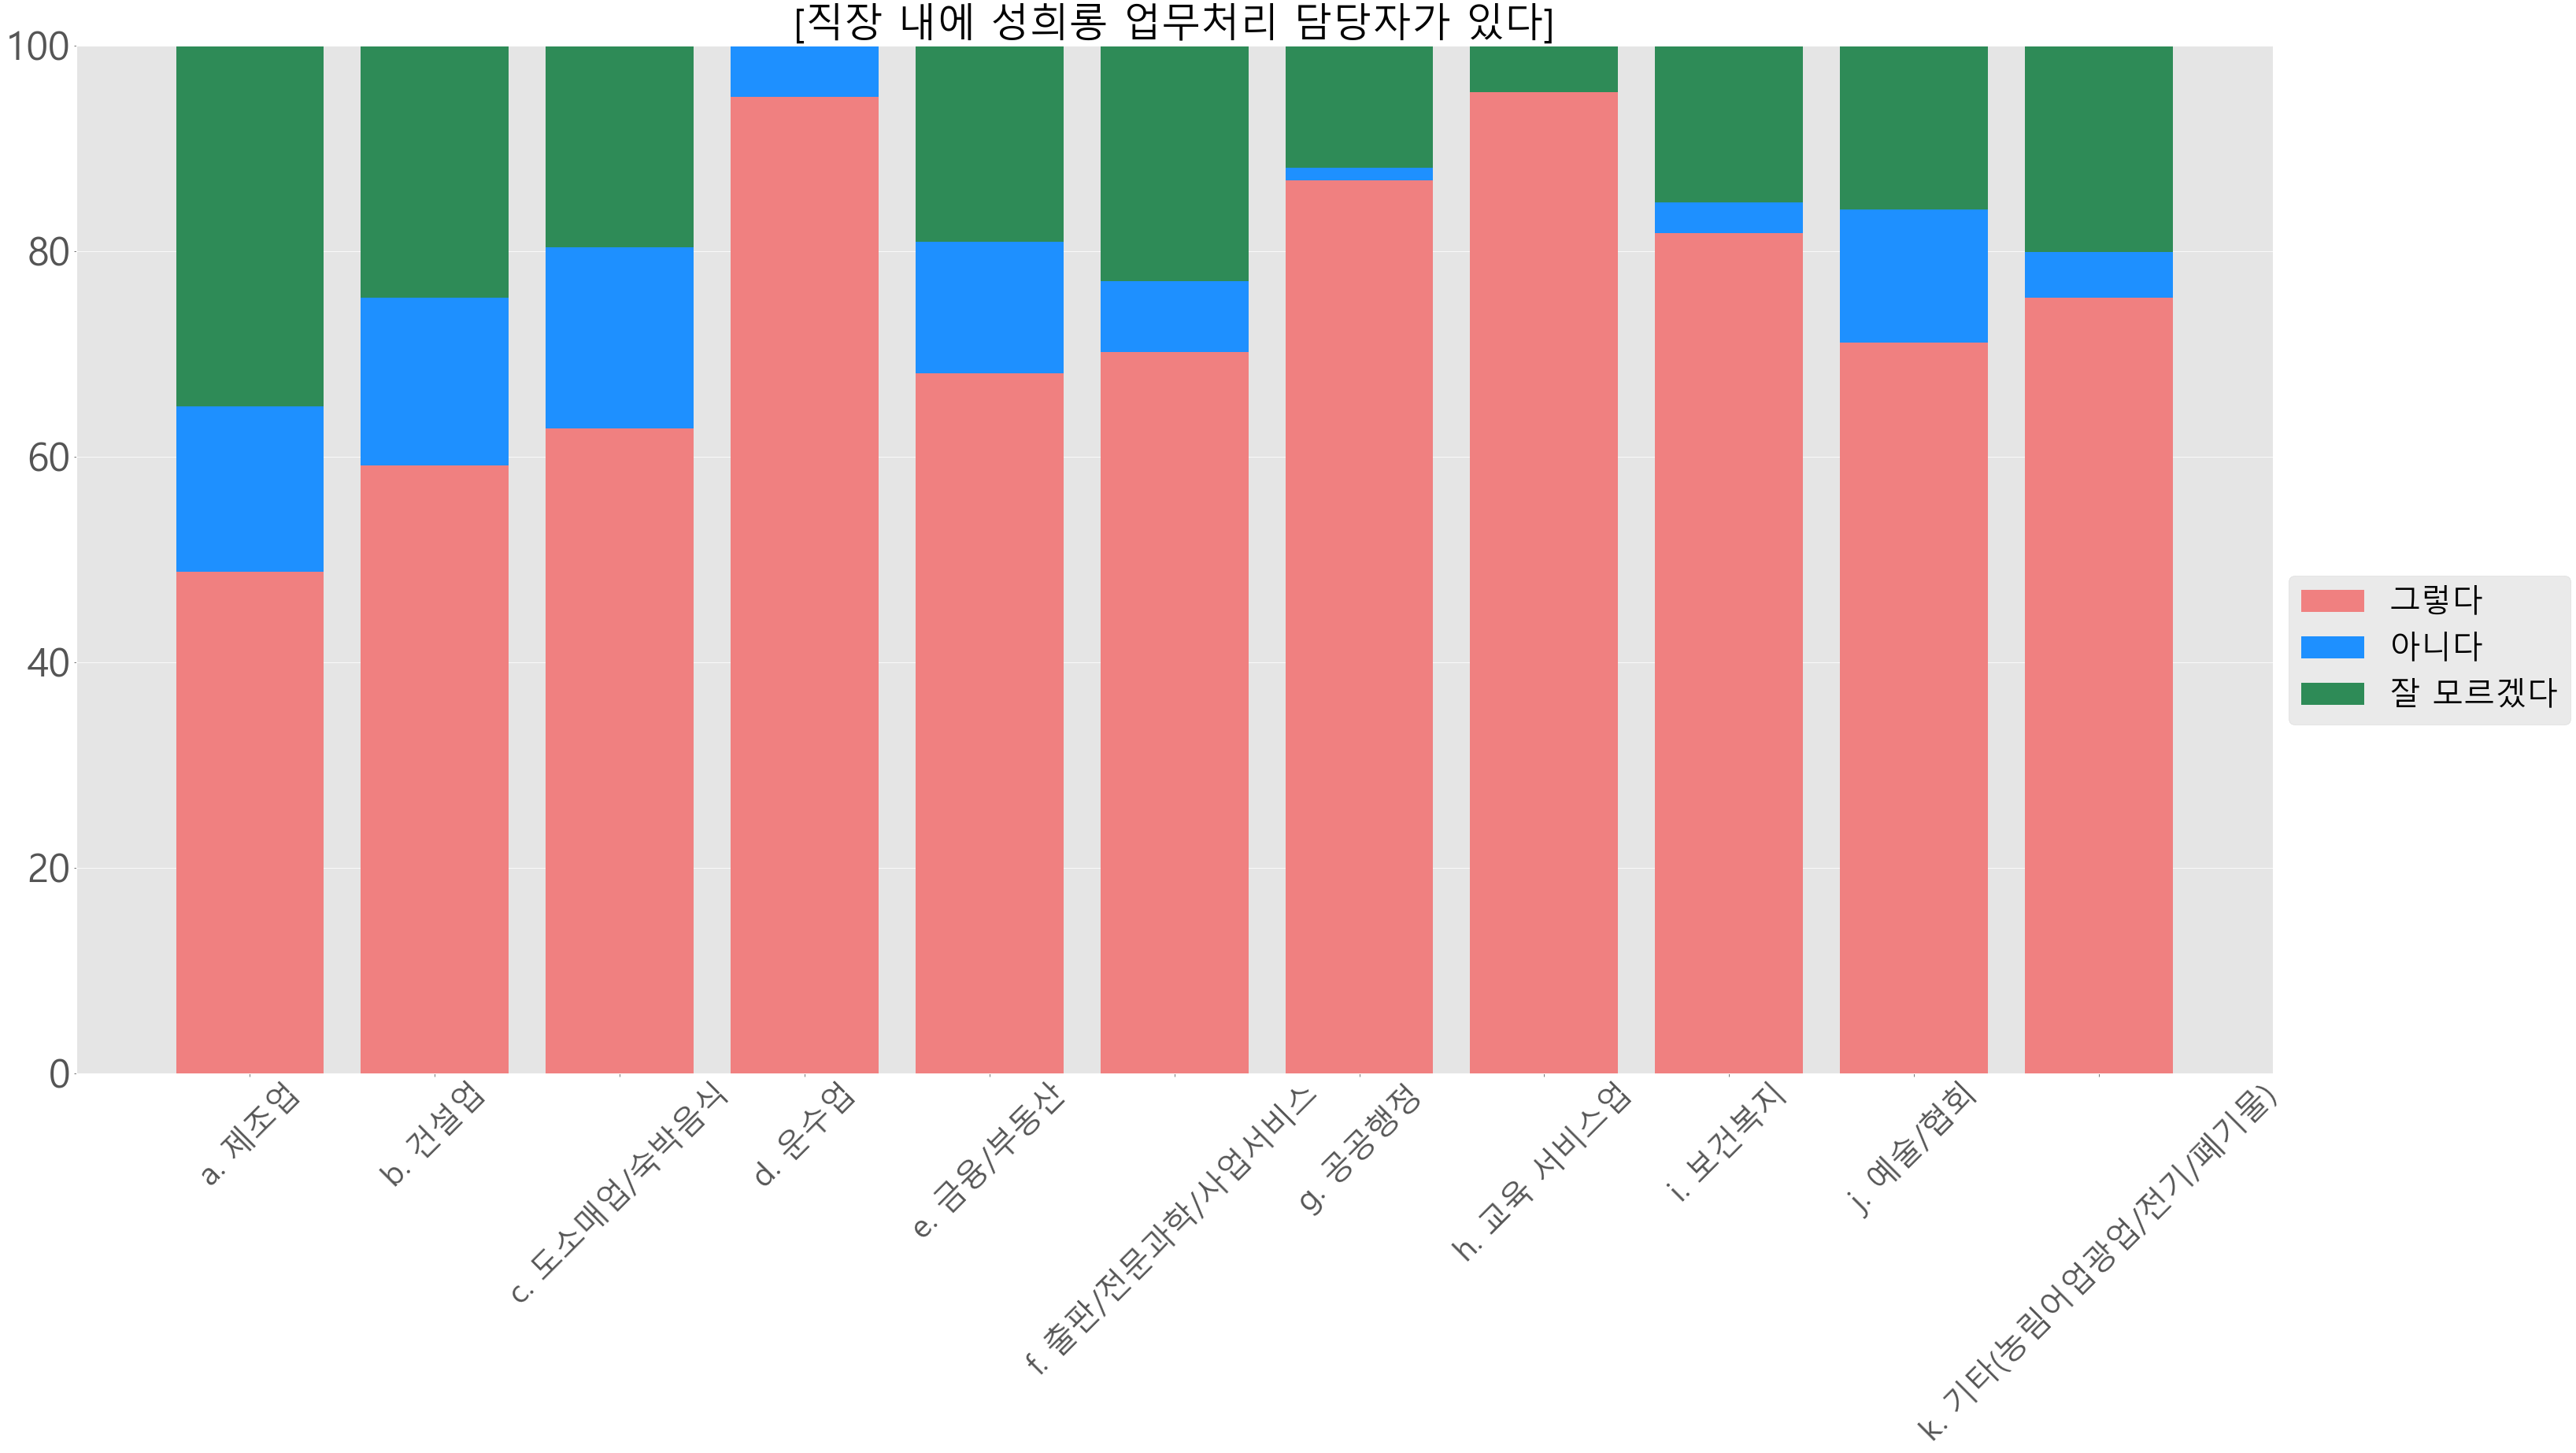

In [ ]:
admin_har_label, yes_data, no_data, dk_data = survey(admin_har, cq, '2018')

plt.rcParams['figure.figsize'] = [50, 24]
plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=40)  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기
plt.title('['+cq+']', fontsize=50)

plt.bar(admin_har_label, yes_data, color='lightcoral', label=yes)
plt.bar(admin_har_label, no_data, color='dodgerblue', bottom =yes_data, label=no)
plt.bar(admin_har_label, dk_data, color='seagreen', bottom =yes_data+no_data, label=dk)

plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))
plt.savefig(fig_path + '직장 내 성희롱 업무처리 담당자 유무.png')

In [ ]:
# x_d1 = np.array([1,3,5,7,9,11,13,15,17,19,21])
# x_d2 = np.array([1+0.5,3+0.5,5+0.5,7+0.5, 9+0.5,11+0.5,13+0.5,15+0.5,17+0.5,19+0.5,21+0.5])


# admin_har_label, yes_data, no_data, dk_data = survey(admin_har, dq, '2018')

# plt.rcParams['figure.figsize'] = [50, 24]
# plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
# #plt.xticks(rotation=45)
# plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=40)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기
# plt.title('['+dq+']', fontsize=50)

# plt.bar(x_d1, yes_data, color='lightcoral', label=yes)
# plt.bar(x_d1, no_data, color='dodgerblue', bottom =yes_data, label=no)
# plt.bar(x_d1, dk_data, color='seagreen', bottom =yes_data+no_data, label=dk)

# plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))


# admin_har_label, yes_data2, no_data2, dk_data2 = survey(admin_har, bq, '2018')

# plt.rcParams['figure.figsize'] = [50, 24]
# plt.rc('axes', labelsize=50)   # x,y축 label 폰트 크기
# plt.rc('xtick', labelsize=40)  # x축 눈금 폰트 크기
# #plt.xticks(rotation=45)
# plt.rc('ytick', labelsize=50)  # y축 눈금 폰트 크기
# plt.rc('legend', fontsize=40)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기
# plt.title('['+bq+']', fontsize=50)

# plt.bar(x_d2, yes_data2, color='r', label=yes)
# plt.bar(x_d2, no_data2, color='g', bottom =yes_data2, label=no)
# plt.bar(x_d2, dk_data2, color='b', bottom =yes_data2+no_data2, label=dk)

# ticklabel=admin_har_label

# plt.xticks(x_d1,ticklabel,fontsize=15,rotation=0)

# plt.legend(loc='upper left', bbox_to_anchor=(1,0.5))

# plt.show()